# K-Nearest Neighbors and Feature Scaling

Goals:

- Learn about the K-Nearest Neighbors machine learning algorithm. How it works and how to use it.
- Use the KNN model on the 2016 Democratic dataset.
- Feature engineering continued: scaling data with standard and minmax scalers.
- How and when to use scaling for you data.
- Class work: compare and contrast KNN and decision tree models on classification supervised learning datasets

## K-Nearest Neighbors

- Known as the "easy" machine learning model
- Classifies an event based on its closest relatives in the data the model has been trained on. Hence the term "Nearest Neighbors". K = number of neighbors.
- Known as a voting classifier because n neighbors vote for the classification.
- Uses Euclidean Distance to calculate similarity.
- Pros: Fast, intuitive, easy to interpret, ability to make probabilities.
- Cons: Poor at handling many features, especially "noisy" features because it treats every feature equally. Not good with small sample sizes. Usually requires scaling.

![ED](https://4.bp.blogspot.com/-UDuXTjw5pbw/WkZ_Yt7qrWI/AAAAAAAAARw/BWh39dRCPzwP1jowVg9lSOH8yfHvrv1lQCLcBGAs/s1600/euclidian.PNG)

Source: Sumit Jha

In [1]:
#Imports
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight");

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
#Fake data time
data = make_classification(n_samples=200,
                           n_features=2,
                           n_classes=2,
                           n_informative=2,
                           n_redundant=0,
                            class_sep=.35,
                           random_state=5)

In [20]:
#Slice the features and target variable from data

X = data[0]
y = data[1]

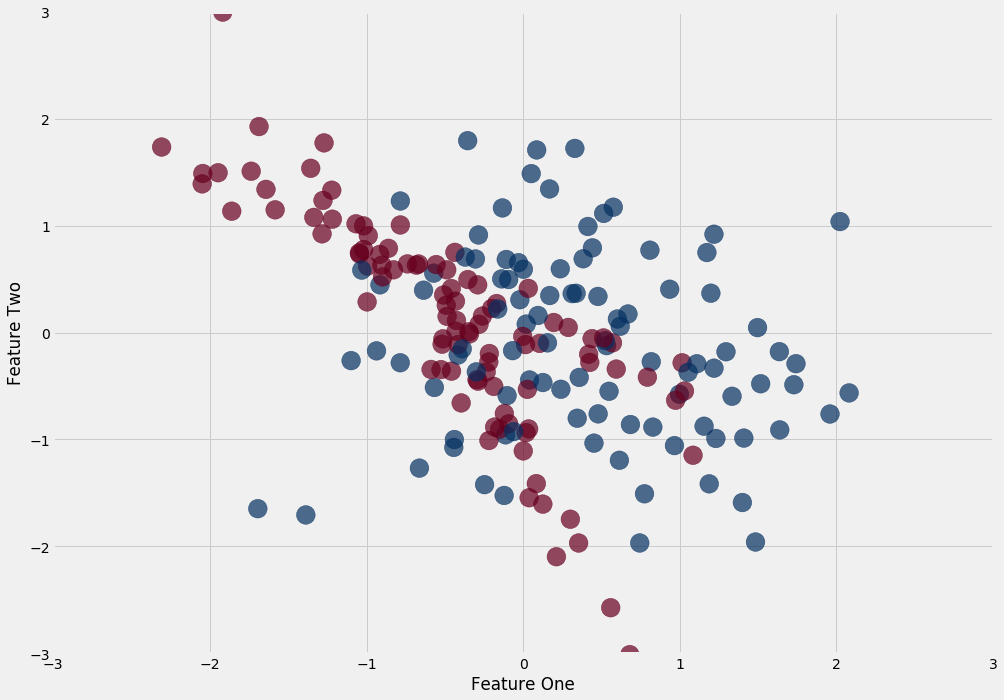

In [21]:
#Plot the data with its color-encodings
plt.figure(figsize=(15,11))
plt.scatter(X[:,0], X[:,1], c=y, cmap= "RdBu", s=350, alpha=.7)
plt.xlabel("Feature One")
plt.ylabel("Feature Two")
plt.xlim(-3,3)
plt.ylim(-3,3);

Time to use K-Nearest Neighbors (KNN) to model this data.

Train a KNN model using 3 neighbors

In [22]:
#intialize model and set n_neighbors equal to 3
knn3 = KNeighborsClassifier(n_neighbors=3)
#Fit the model on the "fake data"
knn3.fit(X,y)
#Find the accuracy score of the model on the data
score3 = knn3.score(X,y)
print ("The model accurately labelled {:.2f} percent of the data".format(score3*100))

The model accurately labelled 89.50 percent of the data


Now with 5 neighbors

In [23]:
#intialize model and set n_neighbors equal to 5
knn5 = KNeighborsClassifier(n_neighbors=5)
#Fit the model on the "fake data"
knn5.fit(X,y)
#Find the accuracy score of the model on the data
score5 = float(knn5.score(X,y))
print ("The model accurately labelled {:.2f} percent of the data".format(score5*100))

The model accurately labelled 85.00 percent of the data


Apply model on a new point

In [24]:
#New data point
new_data = np.asarray([0.18,0.15]).reshape(1,-1)

#Make predictions on new_data using both models
pred3 = knn3.predict(new_data)
pred5 = knn5.predict(new_data)

#Call those predictions
print ("The knn3 model thinks new_data belongs to class {}".format(pred3[0]))
print ("The knn5 model thinks new_data belongs to class {}".format(pred5[0]))

The knn3 model thinks new_data belongs to class 0
The knn5 model thinks new_data belongs to class 1


Look at class probabilities

In [25]:
#Use predict_proba to find class probabilities on new_data
knn3.predict_proba(new_data)

array([[0.66666667, 0.33333333]])

In [26]:
#For 5 neighbors
knn5.predict_proba(new_data)

array([[0.4, 0.6]])

These probabilites are the vote percentages.

Visualize new point in relation to data

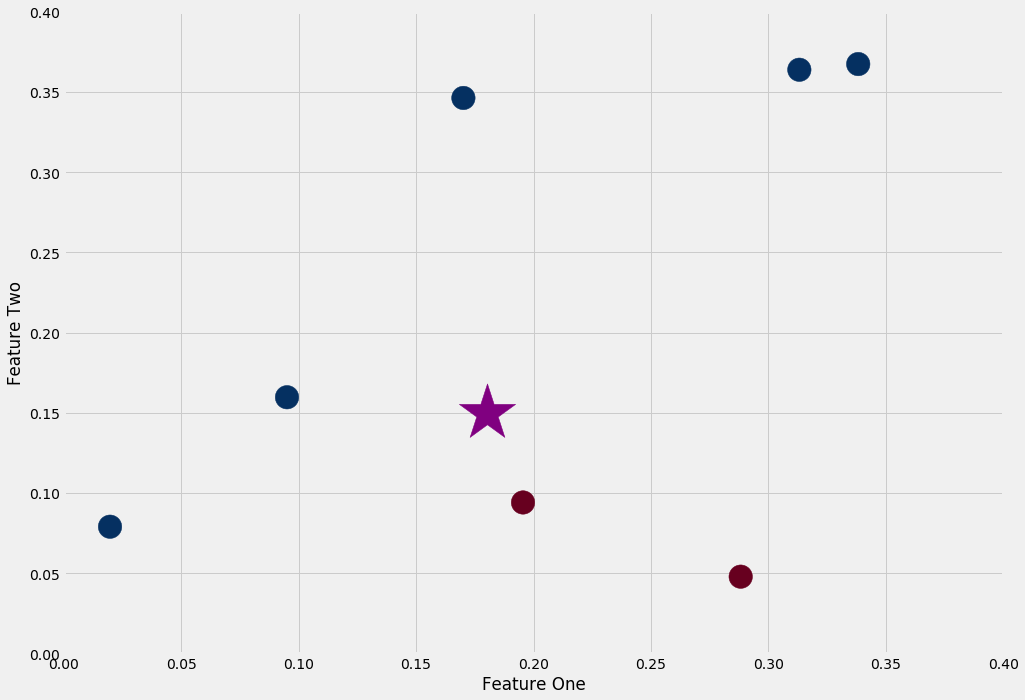

In [29]:
plt.figure(figsize=(15,11))
plt.xlim(0,0.4)
plt.ylim(0,.4)
plt.scatter(X[:,0], X[:,1], c=y, cmap = "RdBu", s=550)
#Plot of new_data point
plt.scatter([0.18], [0.15], c="purple",marker="*", s= 3500)
plt.xlabel("Feature One")
plt.ylabel("Feature Two");

Classify the purple star using the KNN method.

Visualizing KNN

In [34]:
#Load in the plot_decision_boundary function
def plot_decision_boundary(model, X, y, n_neighbors):
    X_max = X.max(axis=0)
    X_min = X.min(axis=0)
    xticks = np.linspace(X_min[0], X_max[0], 100)
    yticks = np.linspace(X_min[1], X_max[1], 100)
    xx, yy = np.meshgrid(xticks, yticks)
    ZZ = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = ZZ >= 0.5
    Z = Z.reshape(xx.shape)
    fig, ax = plt.subplots()
    ax = plt.gca()
    ax.contourf(xx, yy, Z, cmap="RdBu", alpha=0.2)
    ax.scatter(X[:,0], X[:,1], c=y,s=40, cmap = "RdBu", alpha=0.4)
    plt.title("Plot of {} neighbors".format(n_neighbors))
    plt.xlabel("Feature One")
    plt.ylabel("Feature Two")

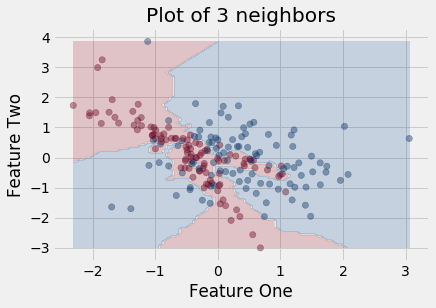

In [35]:
#Visualize the knn3 model
plot_decision_boundary(knn3, X, y, 3);

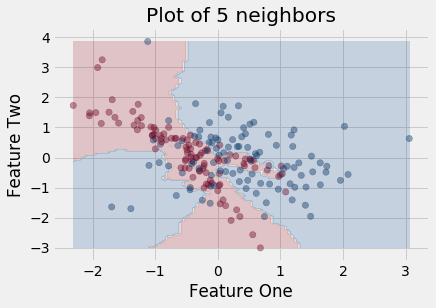

In [36]:
#Visualize the knn5 model
plot_decision_boundary(knn5, X, y, 5);

13 neighbors

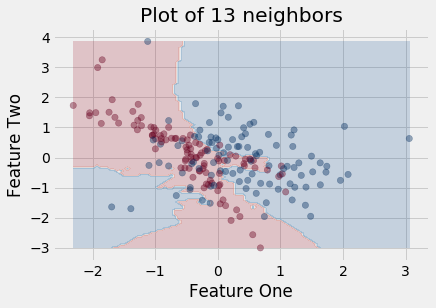

In [37]:
#Plot 13 neighbors
knn13 = KNeighborsClassifier(n_neighbors=13)
knn13.fit(X,y)
plot_decision_boundary(knn13, X, y, 13)

25 neighbors! 

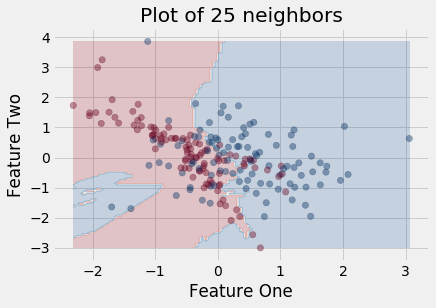

In [38]:
#Plot 25 neighbors
knn25 = KNeighborsClassifier(n_neighbors=25)
knn25.fit(X,y)
plot_decision_boundary(knn25, X, y, 25)

## 2016 Democratic Primary Data

### Data cleaning

Dataset: County-level results of 2016 Democratic Primary and county demographic information.

Kaggle page: https://www.kaggle.com/benhamner/2016-us-election

In [49]:
#Load in data files
primary = pd.read_csv("../../data/primary_data//primary_results.csv")
county = pd.read_csv("../../data/primary_data/county_facts.csv")
county_dict = pd.read_csv("../../data/primary_data/county_facts_dictionary.csv")

Before we can clean model, we have to clean first, but I've already done the work on that already.

In [50]:
#Data cleaning 

subset_col_index = [0,3,5,9,10,12,18,20,23,25,33,34,53]

county = county.iloc[:,subset_col_index].copy()

subset_cols = ["fips","population", "pop_change", "senior_pop_per", "female_pop_per", "black_pop_per",
               "white_pop_per", "foreign_pop_per", "college_degree_pop_", "commute_time", "median_income",
               "poverty_rate", "pop_density"]

col_dict = dict(zip(county.columns, subset_cols))
#Use dictionary to rename the columns
county.rename(columns=col_dict, inplace=True)
primary.dropna(inplace=True)
bern = primary[primary.candidate== "Bernie Sanders"]
hill = primary[primary.candidate== "Hillary Clinton"]
bern = bern[["fips", "candidate", "votes"]]
dem = pd.merge(hill, bern, on="fips")
dem.rename(columns={"votes_x":"clinton_votes", "votes_y":"sanders_votes"}, inplace=True)
dem["winner"] = dem.clinton_votes - dem.sanders_votes
def vote_winner(x):
    if x >0:
        return "H"
    elif x == 0:
        return "TIE"
    else:
        return "B"
    
dem["winner"] = dem.winner.apply(vote_winner)

dem = dem[dem.winner!= "TIE"]
dem = dem[["fips", "winner"]]
df = pd.merge(county, dem, on="fips")
df.set_index("fips", inplace=True)
df.head()

,population,pop_change,senior_pop_per,female_pop_per,black_pop_per,white_pop_per,foreign_pop_per,college_degree_pop_,commute_time,median_income,poverty_rate,pop_density,winner
fips,,,,,,,,,,,,,
1001,55395,1.5,13.8,51.4,18.7,75.6,1.6,20.9,26.2,53682,12.1,91.8,H
1003,200111,9.8,18.7,51.2,9.6,83.0,3.6,27.7,25.9,50221,13.9,114.6,H
1005,26887,-2.1,16.5,46.6,47.6,46.6,2.9,13.4,24.6,32911,26.7,31.0,H
1007,22506,-1.8,14.8,45.9,22.1,74.5,1.2,12.1,27.6,36447,18.1,36.8,H
1009,57719,0.7,17.0,50.5,1.8,87.8,4.3,12.1,33.9,44145,15.8,88.9,H


Time for some modeling. We're going to use KNN to classify counties as Hillary or Bernie.

In [51]:
#Check null accuracy
df.winner.value_counts(normalize=True)

H    0.592272
B    0.407728
Name: winner, dtype: float64

In [52]:
#Assign X and y

X = df.drop("winner", axis = 1)
y = df.winner

In [53]:
#Fit model using a single neighbor

knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X, y)

knn1.score(X, y)

1.0

Perfect model!!!!

Oh wait

In [54]:
#Fit model using three neighbors
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X, y)
knn3.score(X, y)

0.7681473456121344

What happened here?

What about 7 neighbors?

In [55]:
#Fit model using seven neighbors

knn7 = KNeighborsClassifier(n_neighbors=7)
knn7.fit(X, y)
knn7.score(X, y)

0.7038642109064644

Let's try something much higher

In [56]:
#Fit model using 29 neighbors
knn29 = KNeighborsClassifier(n_neighbors=29)
knn29.fit(X, y)
knn29.score(X, y)

0.6522210184182016

Try it out on a testing set

In [57]:
#Make a train/test split. Set test_size = .25 and random state = 42
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25, random_state=42)

Fit model with 5 neighbors on training data and test model on testing data

In [58]:
#Fit model on training data
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)
knn5.score(X_test, y_test)

0.5800865800865801

In [59]:
#Call confusion_matrix 

preds = knn5.predict(X_test)

confusion_matrix(y_test, preds)

array([[126, 157],
       [134, 276]])

Good or bad?
<br><br>
Let's increase number of neighbors

In [60]:
#Fit model on training data
knn17 = KNeighborsClassifier(n_neighbors=17)
knn17.fit(X_train, y_train)
knn17.score(X_test, y_test)

0.5930735930735931

Big difference?

Cross validation time.
<br><br>
Class exercise time: Make a plot of neighbors vs the 5-fold cross validated accuracy score of a KNN model. Use odd numbers from 3 to 39.

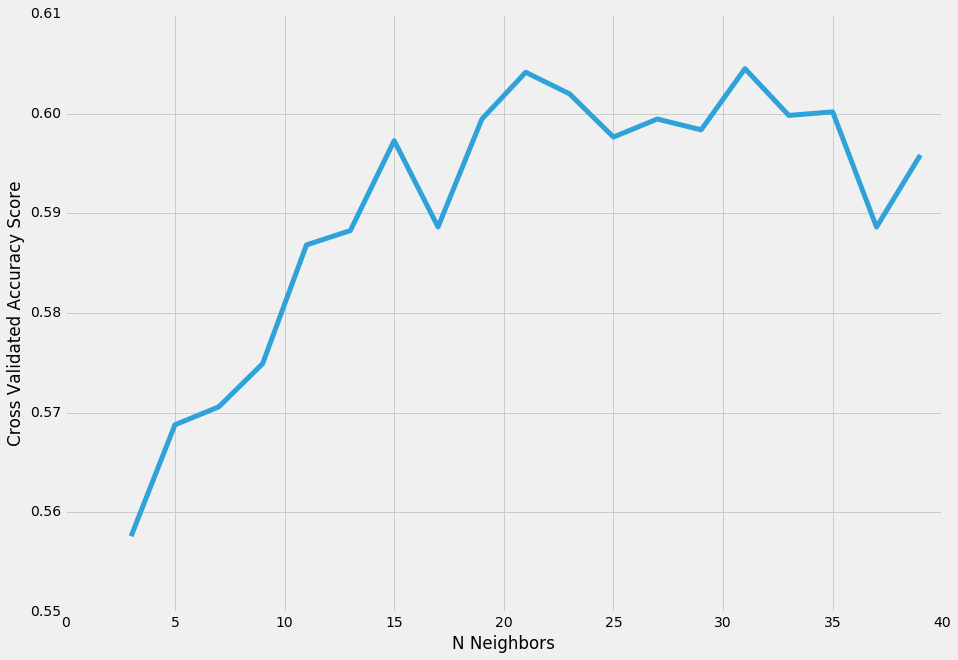

In [57]:
#Initialize neighbors list
neighbors = range(3, 41, 2)
#Intialize list with cross validated scores
cv_scores = []

for i in neighbors:
    #Fit model with i
    model = KNeighborsClassifier(n_neighbors=i)
    cv_score = cross_val_score(model, X, y, cv =5 , scoring="accuracy").mean()
    #Append cv_score to cv_scores
    cv_scores.append(cv_score)
    
    
#Plot line plot of neighbors vs cv_scores
plt.figure(figsize=(14, 10))
plt.plot(neighbors, cv_scores, linewidth = 5)
plt.xlabel("N Neighbors")
plt.ylabel("Cross Validated Accuracy Score")
plt.show()

Which neighbor value/s produces the best accuracy score?
<br><br>
How does that compare to the null accuracy?

What is the issue here? We can't seem to build a model that can significantly beat our null accuracy.
<br><br>
Think about the features and how they differ from each other.


## Scaling Data
<br><br>
[Feature scaling:](https://en.wikipedia.org/wiki/Feature_scaling) A method used to standardize the range of independent variables or features of data

Let's take a look at this sample data set.

In [58]:
#Initialize data
sample = {"income":[30000, 55000, 36000], 
          "white_pop":[50, 85, 95], 
          "college_deg":[15, 40, 50], 
          "class":["A","B", "X"]}

sample= pd.DataFrame(sample)
sample

,class,college_deg,income,white_pop
0,A,15,30000,50
1,B,40,55000,85
2,X,50,36000,95


Which class is row 2 closer to? A or B?
Let's use euclidean distance to figure that out.

In [59]:
#Assign rows in data to variables
class_A = sample.iloc[0, 1:].values
class_B = sample.iloc[1, 1:].values
class_X = sample.iloc[2, 1:].values

In [60]:
#Euclidean distance between class A and class x
np.sqrt(((class_A - class_X)**2).sum())

6000.2708272210511

In [61]:
#Euclidean distance between class B and class x
np.sqrt(((class_B - class_X)**2).sum())

19000.005263157167

Which class should class_X be assigned to based on this calculation? Do you agree or disagree

This example demonstrates the necessity of feature scaling.

From [Sebastian Raschka](http://sebastianraschka.com/Articles/2014_about_feature_scaling.html)

<b>Standardization</b>: "The result of standardization (or Z-score normalization) is that the features will be rescaled so that they’ll have the properties of a standard normal distribution with μ=0μ=0  and σ=1

Where μ is the mean (average) and σσ is the standard deviation from the mean; standard scores (also called z scores) of the samples are calculated as follows:"
![e](http://www.statisticshowto.com/wp-content/uploads/2016/11/alternate-z-score.png)
<br><br>

 


<b>MinMax Scaling</b>: "An alternative approach to Z-score normalization (or standardization) is the so-called Min-Max scaling (often also simply called “normalization” - a common cause for ambiguities).
In this approach, the data is scaled to a fixed range - usually 0 to 1.
The cost of having this bounded range - in contrast to standardization - is that we will end up with smaller standard deviations, which can suppress the effect of outliers.

A Min-Max scaling is typically done via the following equation:"
![d](https://qph.ec.quoracdn.net/main-qimg-0d692d88876aeb26b1f1a578d1c5a94e)

Article on Z formula: http://www.statisticshowto.com/probability-and-statistics/z-score/

Let's scale the features using StandardScaler and MinMaxScaler

In [61]:
#Imports
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [62]:
#Intialize scalers
ss = StandardScaler()
mm = MinMaxScaler()

#Fit data on scalers
ss.fit(X)
mm.fit(X);

We don't have any data yet, we need then transform the data using the fit scalers

In [63]:
#Use ss and mm to transform X
X_ss = ss.transform(X)
X_mm = mm.transform(X)

We can fit and transform at the same time

In [64]:
#Intialize scalers
ss = StandardScaler()
mm = MinMaxScaler()

#Fit and transform data using scalers
X_ss = ss.fit_transform(X)
X_mm = mm.fit_transform(X)

In [65]:
#Make data frames from scaled data. Use columns from X

X_ss = pd.DataFrame(X_ss, columns=X.columns)
X_mm = pd.DataFrame(X_mm, columns=X.columns)

In [66]:
#Take a look at both data frames
X_ss.head()

,population,pop_change,senior_pop_per,female_pop_per,black_pop_per,white_pop_per,foreign_pop_per,college_degree_pop_,commute_time,median_income,poverty_rate,pop_density
0,-0.148823,0.278481,-0.851504,0.622683,0.565499,-0.027820,-0.527947,0.178889,0.518359,0.721738,-0.795982,-0.097887
1,0.293712,2.412106,0.273221,0.535213,-0.039386,0.342080,-0.170632,0.950101,0.461523,0.429408,-0.518507,-0.085256
2,-0.235999,-0.646947,-0.231757,-1.476598,2.486508,-1.477430,-0.295692,-0.671712,0.215234,-1.032661,1.454647,-0.131570
3,-0.249396,-0.569828,-0.621968,-1.782744,0.791500,-0.082805,-0.599411,-0.819149,0.783594,-0.733997,0.128934,-0.128357
4,-0.141716,0.072830,-0.116989,0.229068,-0.557859,0.582016,-0.045571,-0.819149,1.977151,-0.083794,-0.225617,-0.099494


In [67]:
X_mm.head()

,population,pop_change,senior_pop_per,female_pop_per,black_pop_per,white_pop_per,foreign_pop_per,college_degree_pop_,commute_time,median_income,poverty_rate,pop_density
0,0.005467,0.454545,0.198770,0.797753,0.219741,0.759162,0.031189,0.248596,0.500000,0.329539,0.214149,0.001320
1,0.019772,0.658477,0.299180,0.790262,0.112808,0.836649,0.070175,0.344101,0.491667,0.295691,0.248566,0.001648
2,0.002649,0.366093,0.254098,0.617978,0.559342,0.455497,0.056530,0.143258,0.455556,0.126403,0.493308,0.000445
3,0.002216,0.373464,0.219262,0.591760,0.259694,0.747644,0.023392,0.125000,0.538889,0.160985,0.328872,0.000528
4,0.005697,0.434889,0.264344,0.764045,0.021152,0.886911,0.083821,0.125000,0.713889,0.236269,0.284895,0.001278


In [68]:
#What happens when you call .describe() on X_ss
X_ss.describe()

,population,pop_change,senior_pop_per,female_pop_per,black_pop_per,white_pop_per,foreign_pop_per,college_degree_pop_,commute_time,median_income,poverty_rate,pop_density
count,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03
mean,1.283031e-17,5.132125e-18,6.055908e-16,1.429297e-15,1.026425e-16,-4.105700e-17,-5.132125e-17,-5.132125e-17,7.492903e-16,5.132125e-17,1.026425e-17,-5.132125e-18
std,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00
min,-3.179549e-01,-4.477190e+00,-3.078000e+00,-8.692878e+00,-6.775061e-01,-3.651845e+00,-8.138002e-01,-1.828529e+00,-2.891802e+00,-2.124356e+00,-2.522492e+00,-1.486885e-01
25%,-2.799873e-01,-6.212409e-01,-6.219680e-01,-1.645473e-01,-6.176823e-01,-5.976668e-01,-5.994107e-01,-6.943944e-01,-6.941425e-01,-6.461542e-01,-6.880754e-01,-1.372763e-01
50%,-2.349804e-01,-1.585270e-01,-9.403586e-02,1.853329e-01,-4.847405e-01,3.370815e-01,-3.671553e-01,-2.634232e-01,-6.894627e-02,-1.466350e-01,-1.022952e-01,-1.218199e-01
75%,-9.862318e-02,4.841312e-01,5.257105e-01,4.914781e-01,1.733212e-01,8.269496e-01,1.866843e-01,3.830336e-01,6.320314e-01,4.408955e-01,5.605612e-01,-8.054745e-02
max,3.061820e+01,5.985285e+00,8.123342e+00,2.984375e+00,4.979166e+00,1.121870e+00,8.351353e+00,6.246510e+00,3.928521e+00,6.512241e+00,5.539692e+00,3.833573e+01


What do you notice about the means and standard deviations?

What happens when we receive new data? How do we scale it using the scale of our previous data?

In [69]:
#Select San Francisco and Santa Cruz counties
ba = county[(county.fips==6075) | (county.fips==6087)].drop("fips", axis=1)
ba

,population,pop_change,senior_pop_per,female_pop_per,black_pop_per,white_pop_per,foreign_pop_per,college_degree_pop_,commute_time,median_income,poverty_rate,pop_density
229,852469,5.9,14.4,49.1,5.8,41.2,35.6,52.4,30.5,75604,13.5,17179.1
235,271804,3.6,13.5,50.4,1.4,58.2,18.3,37.0,25.4,66519,14.6,589.4


In [70]:
#Use the ss scaler object used to fit and transform X to transform ba.
ba_ss = ss.transform(ba)
ba_ss

array([[ 2.28859267,  1.4095589 , -0.71378225, -0.38322249, -0.29197498,
        -1.74735729,  5.54642291,  3.75141389,  1.33300903,  2.57335405,
        -0.58016851,  9.36834919],
       [ 0.51294611,  0.8183134 , -0.92036438,  0.18533292, -0.58444687,
        -0.89758608,  2.45564033,  2.00484635,  0.3667966 ,  1.80600006,
        -0.41060058,  0.17777926]])

In [71]:
#Use the mm scaler object used to fit and transform X to transform ba.
ba_mm = mm.transform(ba)
ba_mm

array([[0.08425572, 0.56265356, 0.21106557, 0.71161049, 0.06815511,
        0.39895288, 0.69395712, 0.69101124, 0.61944444, 0.54393068,
        0.24091778, 0.24729585],
       [0.02685858, 0.50614251, 0.19262295, 0.76029963, 0.01645123,
        0.57696335, 0.35672515, 0.4747191 , 0.47777778, 0.45508156,
        0.26195029, 0.00848312]])

Class exercise time: 

Work with partner to investigate whether or not our model significantly improves when using scaled data. Which scaler improves our modeling more? Use cross validation and charts and examine as many neighbors as possible.


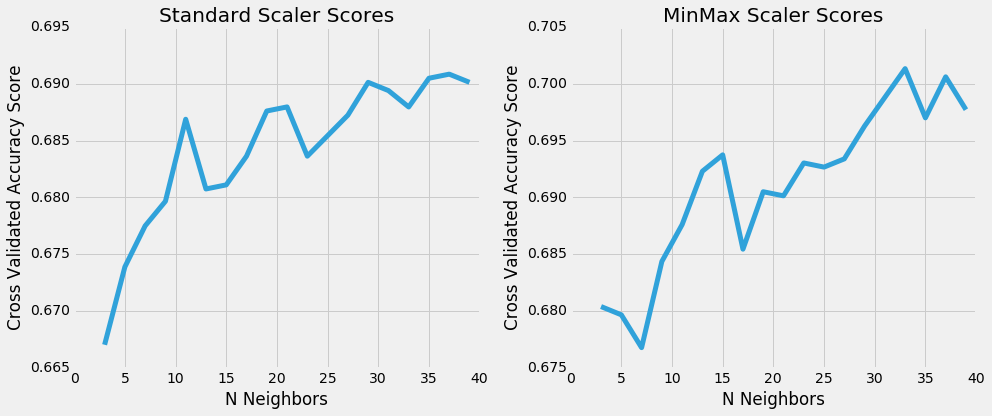

In [73]:
neighbors = range(3, 41, 2)
#Intialize list with cross validated scores
cv_scores_ss = []
cv_scores_mm = []

for i in neighbors:
    #Fit model with i
    model = KNeighborsClassifier(n_neighbors=i)
    cv_score = cross_val_score(model, X_ss, y, cv =5 , scoring="accuracy").mean()
    #Append cv_score to cv_scores_ss
    cv_scores_ss.append(cv_score)

for i in neighbors:
    #Fit model with i
    model = KNeighborsClassifier(n_neighbors=i)
    cv_score = cross_val_score(model, X_mm, y, cv =5 , scoring="accuracy").mean()
    #Append cv_score to cv_scores_mm
    cv_scores_mm.append(cv_score)
    
    
#Plot line plot of neighbors vs cv_scores
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(neighbors, cv_scores_ss, linewidth = 5)
plt.title("Standard Scaler Scores")
plt.xlabel("N Neighbors")
plt.ylabel("Cross Validated Accuracy Score")

plt.subplot(1, 2, 2)
plt.plot(neighbors, cv_scores_mm, linewidth = 5)
plt.title("MinMax Scaler Scores")
plt.xlabel("N Neighbors")
plt.ylabel("Cross Validated Accuracy Score")

plt.tight_layout()
plt.show()


### Resources:
<br>
KNN:
- https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/
- https://www.dataquest.io/blog/k-nearest-neighbors-in-python/
- https://saravananthirumuruganathan.wordpress.com/2010/05/17/a-detailed-introduction-to-k-nearest-neighbor-knn-algorithm/
- http://people.revoledu.com/kardi/tutorial/KNN/index.html
<br><br>

Feature scaling:

- https://machinelearningmastery.com/scale-machine-learning-data-scratch-python/
- https://www.datacamp.com/community/tutorials/preprocessing-in-data-science-part-1-centering-scaling-and-knn
- https://pythonprogramming.net/preprocessing-machine-learning/
- http://benalexkeen.com/feature-scaling-with-scikit-learn/


## In-class lab.
<br><br>
For the rest of class work on modeling one of the following datasets: primary, spotify, employee churn (HR_comma_sep.csv), iris, titanic, or use fake data from sklearn.
<br><br>
Compare and contrast decision trees with KNN. Drop and transform features. Play around as much as possible with the data and see if that improves your model.
<br><br>
Check out bonus lesson in which I use KNN-like algorithm to determine similarities between soccer players and decide which city Amazon should choose for their new headquarters.

### Spotify data

A dataset of songs I like and dislike and their attributes from Spotify. 1 = like, 0 = dislike<br><br>



<b>Attributes:</b>

        Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
        
        Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
        
        Instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
        
        Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
        
        Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
        
More details: https://developer.spotify.com/web-api/get-audio-features/

My article using this dataset: https://opendatascience.com/blog/a-machine-learning-deep-dive-into-my-spotify-data/

In [ ]:
# music = pd.read_pickle("../../data/Spotify_Data.pkl")
# music